# Lorenz Attractor: Euler method and Runge Kutta method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Lorenz Attractor: Euler method

steps: 20000


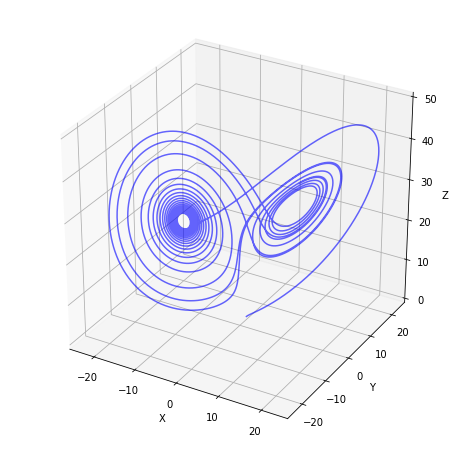

In [3]:
# Lorentz Euler method 
dt = 0.001
T = 20
p, r, b = 10, 28, 8/3
print('steps:', int(T/dt))

def lorenz_euler(V):
    x, y, z = V[0], V[1], V[2]
    X, Y, Z = [], [], []
    t = 0
    while t <= T:
        dx = (-p*x + p*y) * dt
        dy = (-x*z + r*x - y) * dt
        dz = (x*y - b*z) * dt
        x += dx
        y += dy
        z += dz
        X.append(x)
        Y.append(y)
        Z.append(z)
        t += dt
    return X, Y, Z

V0 = [1.0, 1.0, 1.0]
X, Y, Z = lorenz_euler(V0)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
g = 25
ax.set_xlim(-g,g)
ax.set_ylim(-g,g)
ax.set_zlim(0, g*2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot(X, Y, Z, color='blue', alpha=0.6)
plt.show()

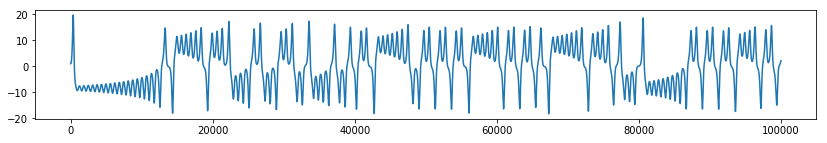

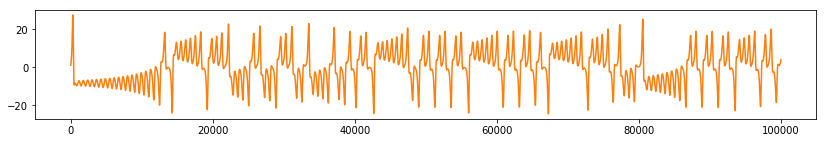

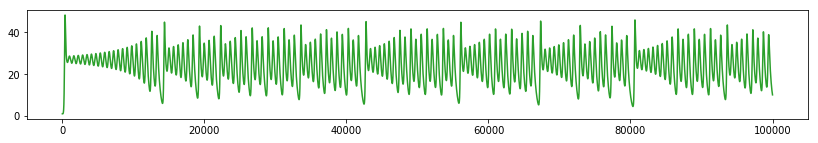

In [398]:
for i, G in enumerate([X, Y, Z]):
    plt.figure(figsize=(14, 2))
    plt.plot(list(range(len(X))), G, color='C'+str(i))
    plt.show()

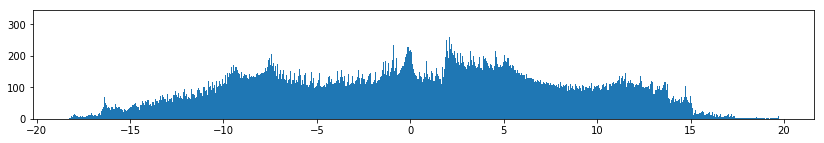

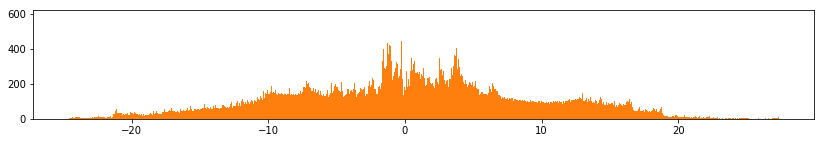

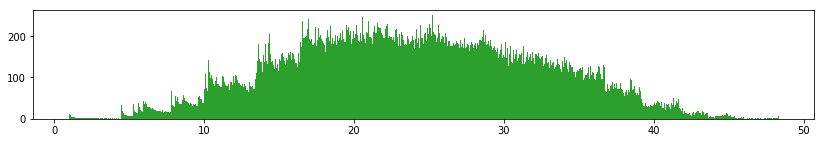

In [399]:
for i, G in enumerate([X, Y, Z]):
    plt.figure(figsize=(14, 2))
    plt.hist(G, len(X)//100, color='C'+str(i))
    plt.show()

## Euler method with O(h) Error

steps: 62
Error: 0.3043499782


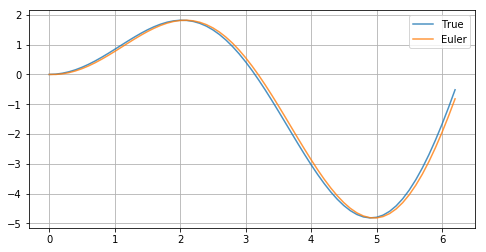

In [662]:
# Euler 
h = 0.1
T = np.pi * 2
print('steps:', int(T/h))

def f(x):
    return x * np.sin(x)

X0 = np.arange(0, T, h)
Y0 = f(X0)

def df(x): # derivative of x*sin(x) : (x*sin(x))' = sin(x) + x*cos(x) 
    return np.sin(x) + x * np.cos(x)

x = 0
y = 0
X = [x]
Y = [y]
while x <= T - h:
    dx = h
    dy = df(x) * h
    x += dx
    y += dy
    X.append(x)
    Y.append(y)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.grid()
ax.plot(X0, Y0, label='True ', alpha=0.8, color='C0')
ax.plot(X, Y, label='Euler', alpha=0.8, color='C1')
ax.legend()
error = max(abs(np.array(Y0)-np.array(Y)))
print('Error:', '{:.10f}'.format(error))

## Runge-Kutta 2nd order method with O(h<sup>3</sup>) Error / Improved Euler method 

steps: 62
Error: 0.0424993184


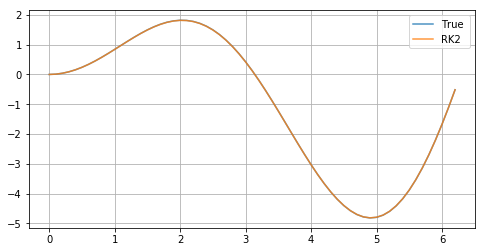

In [645]:
# RK2 
h = 0.1
T = np.pi * 2
print('steps:', int(T/h))

def f(x):
    return x * np.sin(x)

X0 = np.arange(0, T, h)
Y0 = f(X0)

def df(x): # derivative of sin(x)
    return np.sin(x) + x * np.cos(x)

x = 0
y = 0
X2 = [x]
Y2 = [y]

while x <= T - h:
    k1 = df(x)
    k2 = df(x + h)
    x += h
    y += h / 2 * (k1 + k2)
    X2.append(x)
    Y2.append(y)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.grid()
ax.plot(X0, Y0, label='True ', alpha=0.8)
ax.plot(X2, Y2, label='RK2', alpha=0.8)
ax.legend()
error = max(abs(np.array(Y0)-np.array(Y2))) / h
print('Error:', '{:.10f}'.format(error))

## Runge-Kutta 4th order method with O(h<sup>5</sup>) Error

steps: 62
Error: 0.0000030465


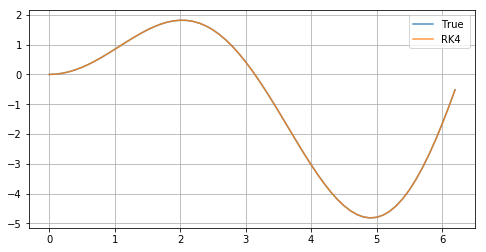

In [646]:
# RK4 
h = 0.1
T = np.pi * 2
print('steps:', int(T/h))

def f(x):
    return x * np.sin(x)

X0 = np.arange(0, T, h)
Y0 = f(X0)

def df(x): # derivative of x*sin(x) : (x*sin(x))' = sin(x) + x*cos(x) 
    return np.sin(x) + x * np.cos(x)

x = 0
y = 0
X4 = [x]
Y4 = [y]

while x < T - h:
    k1 = df(x) * h
    k2 = df(x + h/2) * h
    k3 = df(x + h/2) * h
    k4 = df(x + h) * h
    x += h
    y += (k1 + 2*k2 + 2*k3 + k4) / 6
    X4.append(x)
    Y4.append(y)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.grid()
ax.plot(X0, Y0, label='True ', alpha=0.8)
ax.plot(X4, Y4, label='RK4', alpha=0.8)
ax.legend()
error = max(abs(np.array(Y0)-np.array(Y4))) / h
print('Error:',  '{:.10f}'.format(error))

steps: 62
Error: 0.0000010412


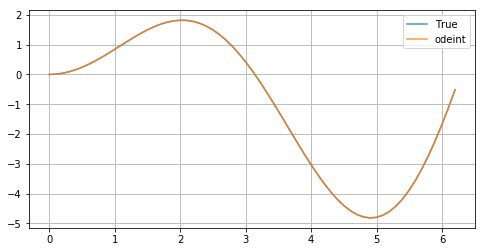

In [648]:
# Odeint 
from scipy.integrate import odeint

h = 0.1 # dt
T = np.pi * 2
print('steps:', int(T/h))

def f(x):
    return x * np.sin(x)

X0 = np.arange(0, T, h)
Y0 = f(X0)

def df(y, x): # derivative of x*sin(x)
    return np.sin(x) + x * np.cos(x)

x = 0
y = 0
Y = odeint(df, y, X0).reshape(-1)
#Y = odeint(f, y, tx, rtol=1e-8, atol=1e-9).reshape(-1)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.grid()
ax.plot(X0, Y0, label='True ', alpha=0.8)
ax.plot(X0, Y, label='odeint', alpha=0.8)
ax.legend()
error = max(abs(Y0-Y)) / h
print('Error:', '{:.10f}'.format(error))

steps: 62
Error: 0.0000010412


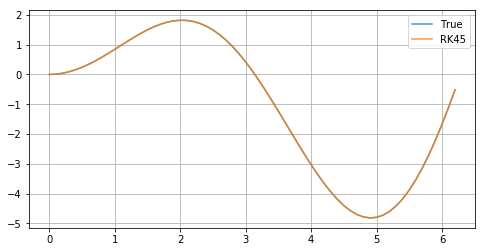

In [654]:
# solve_ivp 
from scipy.integrate import solve_ivp

h = 0.1 # dt
T = np.pi * 2
print('steps:', int(T/h))

def f(x):
    return x * np.sin(x)

X0 = np.arange(0, T, h)
Y0 = f(X0)

def df(x, y): # derivative of x*sin(x)
    return np.sin(x) + x * np.cos(x)

x = 0
y = 0
res = solve_ivp(df, (x, T), np.array([y]), method='RK45', t_eval=X0)
XS = res.t
YS = res.y[0]

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.grid()
ax.plot(X0, Y0, label='True ', alpha=0.8)
ax.plot(XS, YS, label='RK45', alpha=0.8)
ax.legend()
error = max(abs(Y0-Y)) / h
print('Error:', '{:.10f}'.format(error))

## Lorenz Attractor by Runge-Kutta 4th order

In [ ]:
# RK4 
h = 1e-3
T = 20
print('steps:', int(T/h))

def f(xyz, p=10, r=28, b=8/3):
    x, y, z = xyz
    return np.array([-p*x + p*y, -x*z + r*x - y, x*y - b*z])

xyz = np.array([1.0, 1.0, 1.0])
t = 0
X4, Y4, Z4 = [], [], []
while t <= T:
#     k1 = f(xyz)
#     k2 = f(xyz + h/2)
#     k3 = f(xyz + h/2)
#     k4 = f(xyz + h)
    k1 = f(xyz)
    k2 = f(xyz + h*k1/2)
    k3 = f(xyz + h*k2/2)
    k4 = f(xyz + h*k3)
    xyz += (k1 + 2*k2 + 2*k3 + k4) * h / 6
    X4.append(xyz[0])
    Y4.append(xyz[1])
    Z4.append(xyz[2])
    t += h

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
g = 25 
ax.set_xlim(-g, g)
ax.set_ylim(-g, g)
ax.set_zlim(0, 2*g)
ax.plot(X4, Y4, Z4, color='red', alpha=0.6, label='RK4') # plot RK4 method
ax.scatter(X4[0], Y4[0], Z4[0], color='red', s=40, marker='x') # start point
ax.scatter(X4[-1], Y4[-1], Z4[-1], color='red', s=30, marker='o') # end point

ax.plot(X, Y, Z, color='blue', alpha=0.6, label='Euler') # plot Euler method
ax.scatter(X[-1], Y[-1], Z[-1], color='blue', s=30, marker='o')

#ax.scatter(X[0], Y[0], Z[0], color='orange', s=40)
plt.legend()
plt.show()

## Comparison: RK2, RK4, scipy odeint

In [ ]:
# old 
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

h = 1e-3
T = 30
p, r, b = 10, 28, 8/3
print('steps:', int(T/h))

def df(t, xyz):
    x, y, z = xyz
    return np.array([-p*x + p*y, -x*z + r*x - y, x*y - b*z])

def lorenz_RK2(V):
    xyz = V
    t = 0
    X, Y, Z = [], [], []
    while t <= T:
        k1 = df(t, xyz)
        k2 = df(t+h, xyz + h*k1)
        xyz += (k1 + k2) * h / 2
        X.append(xyz[0])
        Y.append(xyz[1])
        Z.append(xyz[2])
        t += h
    return X, Y, Z

def lorenz_RK4(V):
    xyz = V
    t = 0
    X, Y, Z = [], [], []
    while t <= T:
        k1 = df(t, xyz)
        k2 = df(t+h/2, xyz + h*k1/2)
        k3 = df(t+h/2, xyz + h*k2/2)
        k4 = df(t+h, xyz + h*k3)
        xyz += (k1 + 2*k2 + 2*k3 + k4) * h / 6
        X.append(xyz[0])
        Y.append(xyz[1])
        Z.append(xyz[2])
        t += h
    return X, Y, Z

def lorenz_Odeint(V):
    xyz = V
    t = np.arange(0, T, h)
    X, Y, Z = odeint(df, xyz, t, tfirst=True).T 
    #X, Y, Z = odeint(f2, xyz, t, rtol=1e-9, atol=1e-9).T
    return X, Y, Z

def lorenz_ivp(V):
    xyz_0 = np.array(V)
    t = np.arange(0, T, h) 
    res = solve_ivp(df, (0, T), xyz_0, method='RK45', t_eval=t, rtol=1e-7, atol=1e-9)
    X = res.y[0]
    Y = res.y[1]
    Z = res.y[2]
    return X, Y, Z

# xyz_0 = [1.0, 1.0, 1.0]
# X2, Y2, Z2 = lorenz_RK2(xyz_0)
# X4, Y4, Z4 = lorenz_RK4(xyz_0)
# XOd, YOd, ZOd = lorenz_Odeint(xyz_0)
# XI, YI, ZI = lorenz_ivp([1,1,1])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
g = 25 
ax.set_xlim(-g, g)
ax.set_ylim(-g, g)
ax.set_zlim(0, 2*g)

ax.plot(X2, Y2, Z2, color='green', alpha=0.6, label='RK2') # plot RK4 method
ax.scatter(X2[0], Y2[0], Z2[0], color='green', s=60, marker='x') # start point
ax.text(X2[0], Y2[0], Z2[0], s='START  ', verticalalignment='top', horizontalalignment='right')
ax.scatter(X2[-1], Y2[-1], Z2[-1], color='green', s=30, marker='o') # end point

# ax.plot(X4, Y4, Z4, color='red', alpha=0.6, label='RK4') # plot RK4 method
# ax.scatter(X4[0], Y4[0], Z4[0], color='red', s=60, marker='x') # start point
# ax.scatter(X4[-1], Y4[-1], Z4[-1], color='red', s=30, marker='o') # end point

# ax.plot(XO, YO, ZO, color='blue', alpha=0.6, label='Ode') # plot RK4 method
# ax.scatter(XOd[0], YOd[0], ZOd[0], color='blue', s=60, marker='x') # start point
# ax.scatter(XOd[-1], YOd[-1], ZOd[-1], color='blue', s=30, marker='o') # end point

# # #ax.plot(X, Y, Z, color='blue', alpha=0.6, label='Euler') # plot Euler method
# # #ax.scatter(X[-1], Y[-1], Z[-1], color='blue', s=30, marker='o')

# plt.legend()
# plt.show()

## Comparison: RK2, RK4, Odeint, Ivp

In [674]:
# New 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

%matplotlib inline
#%matplotlib notebook

def df(t, xyz):
    x, y, z = xyz
    return np.array([-p*x + p*y, -x*z + r*x - y, x*y - b*z])

def lorenz_RK2(V):
    xyz = V
    t = 0
    X, Y, Z = [], [], []
    while t <= T:
        k1 = df(t, xyz)
        k2 = df(t+h, xyz + h*k1)
        xyz += (k1 + k2) * h / 2
        X.append(xyz[0])
        Y.append(xyz[1])
        Z.append(xyz[2])
        t += h
    return X, Y, Z

def lorenz_RK4(V):
    xyz = V
    t = 0
    X, Y, Z = [], [], []
    while t <= T:
        k1 = df(t, xyz)
        k2 = df(t+h/2, xyz + h*k1/2)
        k3 = df(t+h/2, xyz + h*k2/2)
        k4 = df(t+h, xyz + h*k3)
        xyz += (k1 + 2*k2 + 2*k3 + k4) * h / 6
        X.append(xyz[0])
        Y.append(xyz[1])
        Z.append(xyz[2])
        t += h
    return X, Y, Z

def lorenz_Odeint(V):
    xyz = V
    t = np.arange(0, T, h)
    X, Y, Z = odeint(df, xyz, t, tfirst=True).T 
    #X, Y, Z = odeint(f2, xyz, t, rtol=1e-9, atol=1e-9).T
    return X, Y, Z

def lorenz_ivp(V):
    xyz_0 = np.array(V)
    t = np.arange(0, T, h) 
    res = solve_ivp(df, (0, T), xyz_0, method='RK45', t_eval=t)#, rtol=1e-7, atol=1e-9)
    X = res.y[0]
    Y = res.y[1]
    Z = res.y[2]
    print(X[-1], Y[-1], Z[-1])
    return X, Y, Z

def plot3D(methods, labels):
    from matplotlib.colors import BASE_COLORS
    colorlist = list(BASE_COLORS.keys())
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    g = 30 
    ax.set_xlim(-g, g)
    ax.set_ylim(-g, g)
    ax.set_zlim(0, 2*g)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.xaxis.pane.set_facecolor('white')
    ax.yaxis.pane.set_facecolor('white')
    ax.zaxis.pane.set_facecolor('white')

    for i, XYZ in enumerate(methods):
        X = XYZ[0]
        Y = XYZ[1]
        Z = XYZ[2]
        
        #color = 'C' + str(i)
        color = colorlist[i]
        ax.plot(X, Y, Z, color=color, alpha=0.5, label=labels[i]) # plot method
        ax.scatter(X[0], Y[0], Z[0], color=color, s=60, marker='x') # start point
        ax.text(X[0], Y[0], Z[0], s='START  ', color=color, verticalalignment='top', horizontalalignment='right')
        ax.scatter(X[-1], Y[-1], Z[-1], color=color, s=30, marker='o') # end point

    plt.legend()
    plt.show()

def plot2D(methods, labels, axis):
    from matplotlib.colors import BASE_COLORS
    colorlist = list(BASE_COLORS.keys())
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.axis([-30, 30, 0, 60], 'equal')
    if axis == 'XY':
        ax.axis([-30, 30, -30, 30], 'equal')     
    ax.grid()
    
    for i, XYZ in enumerate(methods):
        if axis == 'XY':
            A = XYZ[0]
            B = XYZ[1]
        elif axis == 'XZ':
            A = XYZ[0]
            B = XYZ[2]
        else:
            A = XYZ[1]
            B = XYZ[2]
        
        color = colorlist[i]
        ax.plot(A, B, color=color, alpha=0.5, label=labels[i])  # plot line
        ax.scatter(A[0], B[0], color=color, s=60, marker='x')   # start point
        ax.text(A[0], B[0], s='START  ', color=color, verticalalignment='center', horizontalalignment='right')
        ax.scatter(A[-1], B[-1], color=color, s=30, marker='o') # end point
    plt.legend()
    plt.show()
    print(axis + ' coordinates')

def plot1D(methods, labels, axis):
    plt.figure(figsize=(14, 3))
    for i, XYZ in enumerate(methods):
        if axis == 'X':
            A = XYZ[0]
        elif axis == 'Y':
            A = XYZ[1]
        else:
            A = XYZ[2]
        plt.plot(list(range(len(A))), A, color='C'+str(i), alpha=0.6, label=labels[i])
    plt.legend()
    plt.show()

steps: 30000
-3.65404559363219 -4.876156617887153 18.313298887982672


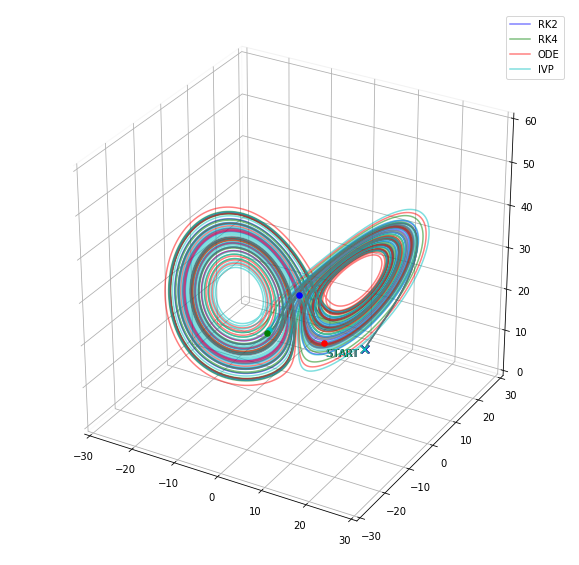

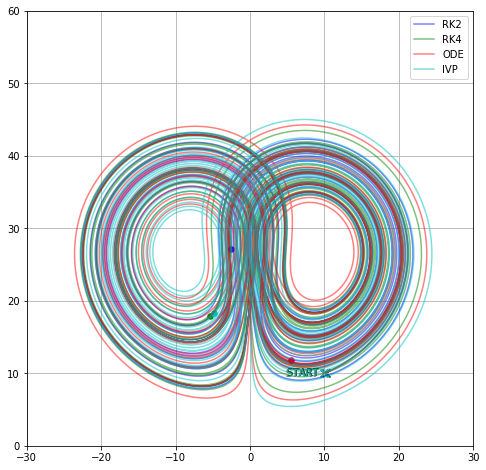

YZ coordinates


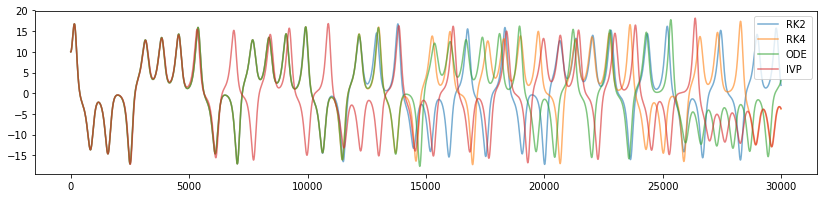

In [676]:
h = 1e-3 # dt
T = 30   # total time
p, r, b = 10, 28, 8/3
print('steps:', int(T/h))

xyz_0 = [10.0, 10.0, 10.0] # initial values for the methods 
methods = [lorenz_RK2(xyz_0), lorenz_RK4(xyz_0), lorenz_Odeint(xyz_0), lorenz_ivp(xyz_0)]
labels = ['RK2', 'RK4', 'ODE', 'IVP']

plot3D(methods, labels)
# plot2D(methods, labels, 'XY')
# plot2D(methods, labels, 'XZ')
plot2D(methods, labels, 'YZ')
plot1D(methods, labels, 'X')

## Comparison: start with tiny error on the same RK4 method 

steps: 50000


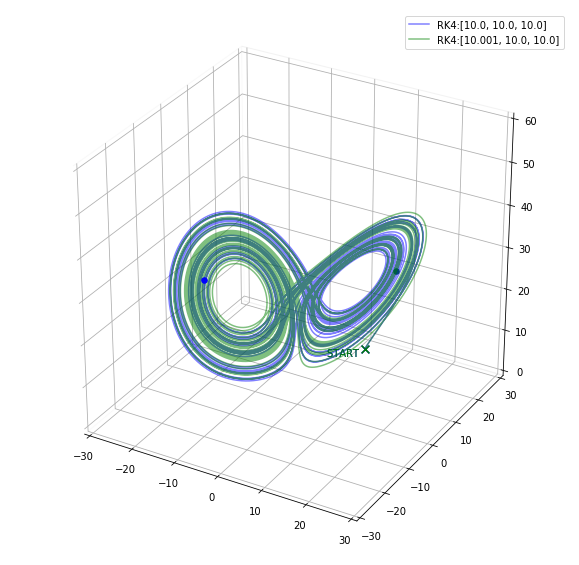

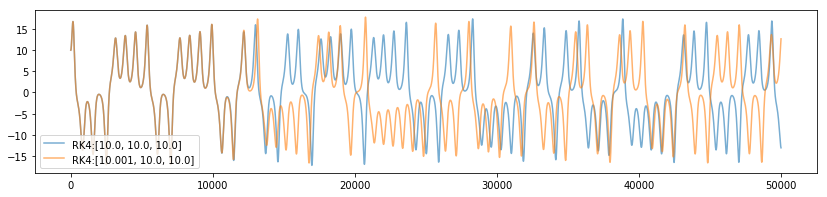

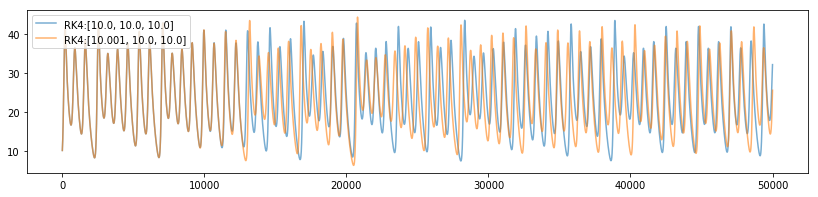

In [476]:
h = 1e-3
T = 50
p, r, b = 10, 28, 8/3
print('steps:', int(T/h))

xyz_0 = [10.0, 10.0, 10.0]
xyz_1 = [10.001, 10.0, 10.0]
methods = [lorenz_RK4(xyz_0), lorenz_RK4(xyz_1)]
labels = ['RK4:'+str(xyz_0), 'RK4:'+str(xyz_1)]

plot3D(methods, labels)
# plot2D(methods, labels, 'XY')
# plot2D(methods, labels, 'XZ')
# plot2D(methods, labels, 'YZ')
plot1D(methods, labels, 'X')
plot1D(methods, labels, 'Z')

In [ ]:
# auto label
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

%matplotlib inline
#%matplotlib notebook

h = 1e-3
T = 30
p, r, b = 10, 28, 8/3
print('steps:', int(T/h))

def df(t, xyz):
    x, y, z = xyz
    return np.array([-p*x + p*y, -x*z + r*x - y, x*y - b*z])

def lorenz_RK2(V):
    xyz = V
    t = 0
    X, Y, Z = [], [], []
    while t <= T:
        k1 = df(t, xyz)
        k2 = df(t+h, xyz + h*k1)
        xyz += (k1 + k2) * h / 2
        X.append(xyz[0])
        Y.append(xyz[1])
        Z.append(xyz[2])
        t += h
    return X, Y, Z, 'RK2'

def lorenz_RK4(V):
    xyz = V
    t = 0
    X, Y, Z = [], [], []
    while t <= T:
        k1 = df(t, xyz)
        k2 = df(t+h/2, xyz + h*k1/2)
        k3 = df(t+h/2, xyz + h*k2/2)
        k4 = df(t+h, xyz + h*k3)
        xyz += (k1 + 2*k2 + 2*k3 + k4) * h / 6
        X.append(xyz[0])
        Y.append(xyz[1])
        Z.append(xyz[2])
        t += h
    return X, Y, Z, 'RK4'

def lorenz_Odeint(V):
    xyz = V
    t = np.arange(0, T, h)
    X, Y, Z = odeint(df, xyz, t, tfirst=True).T 
    #X, Y, Z = odeint(f2, xyz, t, rtol=1e-9, atol=1e-9).T
    return X, Y, Z, 'ODE'

def lorenz_ivp(V):
    xyz_0 = np.array(V)
    t = np.arange(0, T, h) 
    res = solve_ivp(df, (0, T), xyz_0, method='RK45', t_eval=t)#, rtol=1e-7, atol=1e-9)
    X = res.y[0]
    Y = res.y[1]
    Z = res.y[2]
    print(X[-1], Y[-1], Z[-1])
    return X, Y, Z, 'IVP'

def plot3D(methods):
    from matplotlib.colors import BASE_COLORS
    colorlist = list(BASE_COLORS.keys())
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    g = 30 
    ax.set_xlim(-g, g)
    ax.set_ylim(-g, g)
    ax.set_zlim(0, 2*g)
    ax.xaxis.pane.set_facecolor('white')
    ax.yaxis.pane.set_facecolor('white')
    ax.zaxis.pane.set_facecolor('white')

    for i, XYZ in enumerate(methods):
        X = XYZ[0]
        Y = XYZ[1]
        Z = XYZ[2]
        label = XYZ[3]
        #color = 'C' + str(i)
        color = colorlist[i]
        ax.plot(X, Y, Z, color=color, alpha=0.5, label=label) # plot method
        ax.scatter(X[0], Y[0], Z[0], color=color, s=60, marker='x') # start point
        ax.text(X[0], Y[0], Z[0], s='START  ', color=color, verticalalignment='top', horizontalalignment='right')
        ax.scatter(X[-1], Y[-1], Z[-1], color=color, s=30, marker='o') # end point

    plt.legend()
    plt.show()

def plot2D(methods, axis):
    from matplotlib.colors import BASE_COLORS
    colorlist = list(BASE_COLORS.keys())
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.axis([-30, 30, 0, 60], 'equal')
    if axis == 'XY':
        ax.axis([-30, 30, -30, 30], 'equal')     
    ax.grid()
    
    for i, XYZ in enumerate(methods):
        if axis == 'XY':
            A = XYZ[0]
            B = XYZ[1]
        elif axis == 'XZ':
            A = XYZ[0]
            B = XYZ[2]
        else:
            A = XYZ[1]
            B = XYZ[2]
        
        color = colorlist[i]
        label = XYZ[3]
        ax.plot(A, B, color=color, alpha=0.5, label=label)  # plot line
        ax.scatter(A[0], B[0], color=color, s=60, marker='x')   # start point
        ax.text(A[0], B[0], s='START  ', color=color, verticalalignment='center', horizontalalignment='right')
        ax.scatter(A[-1], B[-1], color=color, s=30, marker='o') # end point
    plt.legend()
    plt.show()
    print(axis + ' coordinates')

xyz_0 = [1.0, 1.0, 1.0] # initial values for the methods 
methods = [lorenz_RK2(xyz_0), lorenz_RK4(xyz_0), lorenz_Odeint(xyz_0), lorenz_ivp(xyz_0)]

plot3D(methods)
#plot2D(methods, 'XY')
#plot2D(methods, 'XZ')
plot2D(methods, 'YZ')

In [249]:
import IPython.display
sec = 1
rate = 8000
tm = np.linspace(0, sec, sec * rate) * 2 * np.pi
base = 220*2

sig = []
for n in range(16):
    if n in [0, 2, 4, 5, 7, 9, 11, 12]:
        sig += list(base * 2 ** (n / 12) * tm)
w = np.sin(sig)
IPython.display.Audio(w , rate=rate)

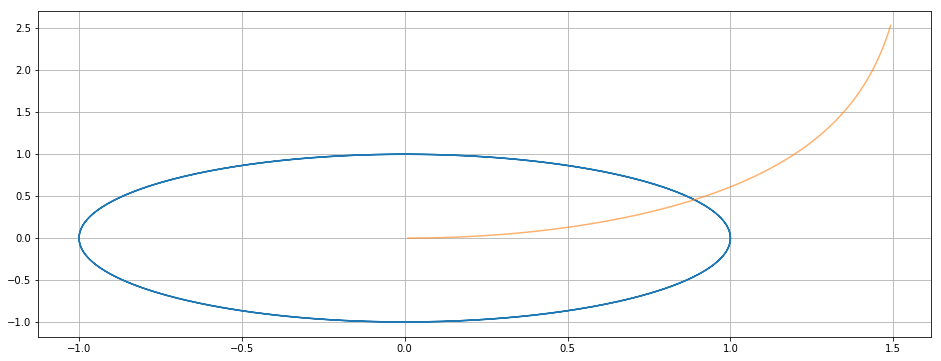

In [586]:
def f(x):
    return np.exp(1j * x)

def df(x):
    return np.exp(1j * x)

dt = 0.01
T = 2 * np.pi
X0 = np.arange(0, T*2, dt)
Y0 = f(X0)

xy = 0
XY = np.array([])
t = 0
while t < T*2:
    dxy = df(t) * dt
    xy += dxy
    XY = np.append(XY, xy)
    t += dt

plt.figure(figsize=(16,6))
#plt.axis('equal')
plt.grid()

plt.plot(np.cos(X0.real), Y0.imag, label='True')
plt.plot(XY.real, XY.imag, alpha=0.6, label='Eul')
# diff = max(Y) - max(Y0)
# plt.plot(np.array(X)-diff, np.array(Y)-diff, alpha=0.6, label='Eul')
# plt.legend()
# plt.show()

In [172]:
def f(x):
    return 1/4 * x**2 + 4
h = 4
x1 = 0

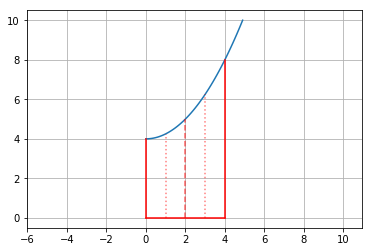

In [180]:
X = np.arange(0, 5, 0.1)
plt.grid()
plt.axis('equal')
plt.plot(X, f(X))
plt.plot([x1, x1], [0, f(x1)], c='r')
plt.plot([x1+h, x1+h], [0, f(x1+h)], c='r')
plt.plot([x1, x1+h], [0, 0], c='r')
plt.plot([x1+h/2, x1+h/2], [0, f(x1+h/2)], c='r', linestyle='--', alpha=0.6)
plt.plot([x1+h/4, x1+h/4], [0, f(x1+h/4)], c='r', linestyle=':', alpha=0.5)
plt.plot([x1+h/4*3, x1+h/4*3], [0, f(x1+h/4*3)], c='r', linestyle=':', alpha=0.5)

In [139]:
def df(x):
    return 1/10*2*x

In [181]:
t = 0
T = 4
S = 0
dt = 0.001
while t <= T:
    ds = f(t)*dt
    S += ds
    t += dt
S

21.339333499999277

In [241]:
p1 = f(x1)
ph = f(x1+h/2)
p2 = f(x1+h)
ph - (ph - (p1 + p2) / 2) / 3 
ph - ph/3 + (p1 + p2)/6
4*ph/6 +(p1 + p2)/6

5.333333333333334

In [214]:
k1 = f(x1)
k2 = f(x1 + h/2)
k3 = f(x1 + h/2)
k4 = f(x1 + h)
(k1 + 2*k2 + 2*k3 + k4)/6, 

(5.333333333333333,)

In [234]:
p1 = f(x1)              # 4
p2 = f(x1+h/2)          # 5
p3 = f(x1+h)            # 8
p13 = (p1+p3)/2
p123 = (p1+p2+p3)/3     # 5.67 
p1223 = (p1+p2*2+p3)/4  # 5.5
p12223 = (p1+p2*3+p3)/5 # 5.4
p122223= (p1+p2*4+p3)/6 # 5.33
(p13*2+p2*4)/6, (p13 + p2*2)/3, (p13+p2*2)/3

(5.333333333333333, 5.333333333333333, 5.333333333333333)